<a href="https://colab.research.google.com/github/Abhi050/Machine_Learning/blob/master/Stats_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data = np.array([15,20,25,28,24,26,27,26,25,31,33])

In [3]:
df = pd.DataFrame(data)
print(df)
print(df.describe())

     0
0   15
1   20
2   25
3   28
4   24
5   26
6   27
7   26
8   25
9   31
10  33
               0
count  11.000000
mean   25.454545
std     4.885973
min    15.000000
25%    24.500000
50%    26.000000
75%    27.500000
max    33.000000


the above values of are q1,q2,q3 of box-whisker plot


{'boxes': [<matplotlib.lines.Line2D at 0x7eff7ad6f748>],
 'caps': [<matplotlib.lines.Line2D at 0x7eff7ad6ff60>,
 'fliers': [<matplotlib.lines.Line2D at 0x7eff7ad07978>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7eff7ad07630>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7eff7ad6f8d0>,
  <matplotlib.lines.Line2D at 0x7eff7ad6fc18>]}

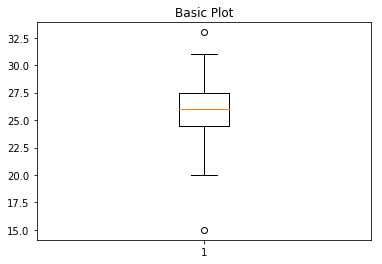

In [4]:
fig1,ax1 = plt.subplots()
ax1.set_title("Basic Plot")
ax1.boxplot(data)

This is the graph of box-whisker plot

####################################################################

**BASIC STATS AND DATA VISUALIZATION**

DATASET: pima indians diabetes dataset

In [0]:

names=["preg","plas","pres","skin","test","mass","pedi","age","class"]
df = pd.read_csv("diabetes.csv",names=names)

In [6]:
print(df.head())
print(df.shape)
print(df.describe())


          preg     plas           pres  ...                      pedi  age    class
0  Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
1            6      148             72  ...                     0.627   50        1
2            1       85             66  ...                     0.351   31        0
3            8      183             64  ...                     0.672   32        1
4            1       89             66  ...                     0.167   21        0

[5 rows x 9 columns]
(769, 9)
       preg plas pres skin test mass   pedi  age class
count   769  769  769  769  769  769    769  769   769
unique   18  137   48   52  187  249    518   53     3
top       1   99   70    0    0   32  0.254   22     0
freq    135   17   57  227  374   13      6   72   500


In [7]:
pd.set_option("precision",2)
print(df.describe())

       preg plas pres skin test mass   pedi  age class
count   769  769  769  769  769  769    769  769   769
unique   18  137   48   52  187  249    518   53     3
top       1   99   70    0    0   32  0.254   22     0
freq    135   17   57  227  374   13      6   72   500


In [8]:
class_counts=df.groupby("class").size()
print(class_counts)

class
0          500
1          268
Outcome      1
dtype: int64


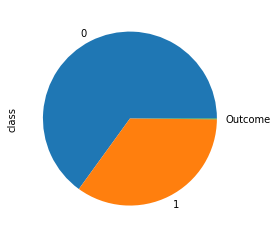

In [9]:
fig,ax =plt.subplots()
df["class"].value_counts().plot(ax=ax,kind="pie")


1              135
0              111
2              103
3               75
4               68
5               57
6               50
7               45
8               38
9               28
10              24
11              11
13              10
12               9
14               2
Pregnancies      1
15               1
17               1
Name: preg, dtype: int64


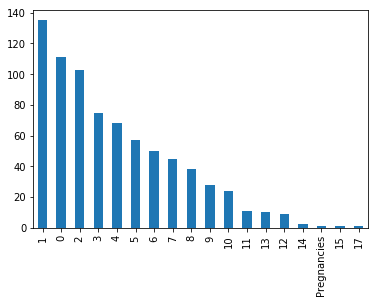

In [10]:
print(df["preg"].value_counts(sort=True))
fig,ax =plt.subplots()
df["preg"].value_counts().plot(ax=ax,kind="bar")#kind=pie


In [11]:
df["preg"].value_counts().mode()

0    1
dtype: int64

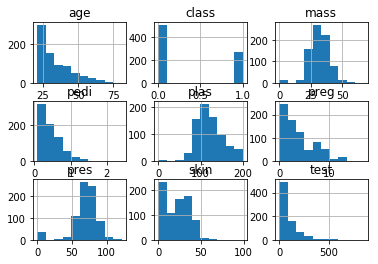

In [13]:
df=df[1:].astype(np.float)
df.hist()
plt.show()

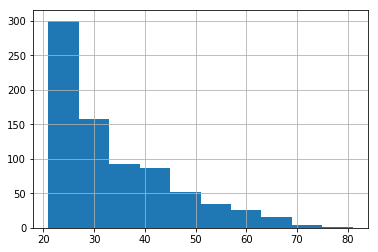

In [14]:
df["age"].hist()
plt.show()

In [15]:
print(df["age"])
skews=df["age"].skew()
print(skews)

1      50.0
2      31.0
3      32.0
4      21.0
5      33.0
6      30.0
7      26.0
8      29.0
9      53.0
10     54.0
11     30.0
12     34.0
13     57.0
14     59.0
15     51.0
16     32.0
17     31.0
18     31.0
19     33.0
20     32.0
21     27.0
22     50.0
23     41.0
24     29.0
25     51.0
26     41.0
27     43.0
28     22.0
29     57.0
30     38.0
       ... 
739    21.0
740    42.0
741    48.0
742    26.0
743    22.0
744    45.0
745    39.0
746    46.0
747    27.0
748    32.0
749    36.0
750    50.0
751    22.0
752    28.0
753    25.0
754    26.0
755    45.0
756    37.0
757    39.0
758    52.0
759    26.0
760    66.0
761    22.0
762    43.0
763    33.0
764    63.0
765    27.0
766    30.0
767    47.0
768    23.0
Name: age, Length: 768, dtype: float64
1.1295967011444805


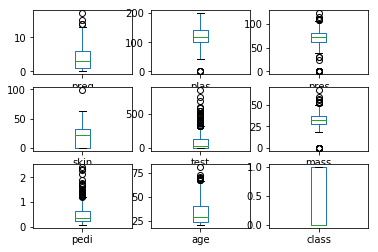

In [16]:
df.plot(kind="box",subplots=True,layout=(3,3))
plt.show()

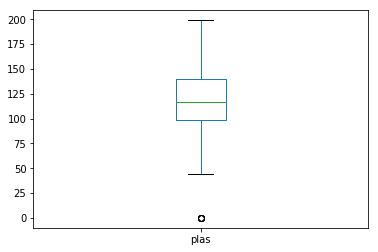

In [17]:
df['plas'].plot(kind="box")

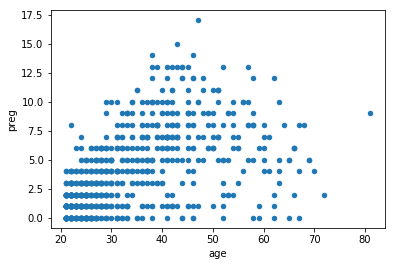

In [18]:
df.plot.scatter(x="age",y="preg")

#####IN SAME WAY WE CAN DO FOR CORRELATION,BOX-WHISKER PLOT,ETC.

#################################

LINEAR REGRESSION USING mtcars dataset

TAsk is to predict mileage from the given data

In [38]:
df1=pd.read_csv("mtcars.csv")
print(df1.head())
print(df1.describe())
print(df.info())

          Unnamed: 0   mpg  cyl   disp   hp  ...   qsec  vs  am  gear  carb
0          Mazda RX4  21.0    6  160.0  110  ...  16.46   0   1     4     4
1      Mazda RX4 Wag  21.0    6  160.0  110  ...  17.02   0   1     4     4
2         Datsun 710  22.8    4  108.0   93  ...  18.61   1   1     4     1
3     Hornet 4 Drive  21.4    6  258.0  110  ...  19.44   1   0     3     1
4  Hornet Sportabout  18.7    8  360.0  175  ...  17.02   0   0     3     2

[5 rows x 12 columns]
         mpg    cyl    disp      hp   drat  ...   qsec     vs     am   gear   carb
count  32.00  32.00   32.00   32.00  32.00  ...  32.00  32.00  32.00  32.00  32.00
mean   20.09   6.19  230.72  146.69   3.60  ...  17.85   0.44   0.41   3.69   2.81
std     6.03   1.79  123.94   68.56   0.53  ...   1.79   0.50   0.50   0.74   1.62
min    10.40   4.00   71.10   52.00   2.76  ...  14.50   0.00   0.00   3.00   1.00
25%    15.43   4.00  120.83   96.50   3.08  ...  16.89   0.00   0.00   3.00   2.00
50%    19.20   6.00  19

In [41]:
df1.columns


Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')

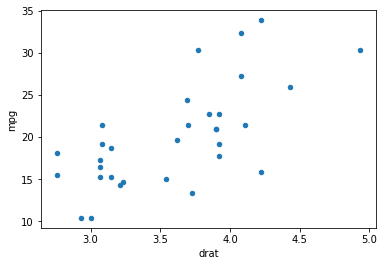

In [56]:
df.plot.scatter(y="mpg",x="drat")
plt.show()